<a href="https://colab.research.google.com/github/FadeZx/DT-467_ChessMoveTracking/blob/PieceDetection/2_2024_DT_467_ChessMove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset preparation / Preprocessing

In [ ]:
#import dataset1 no oriented
!pip install -U gdown
!gdown --folder https://drive.google.com/drive/folders/1-NaFCqOomOCt5EpskeDT7ez1_DZ_8k3m

Retrieving folder contents
Processing file 1sw65JD2BTd6b24ZpiMPrdlT8ckvBI1hq frame0.jpg
Processing file 1U1DJyDGWuZTt6NWBym1LsdVNK2yIwYkX frame55.jpg
Processing file 1fPd0Lz1UfnW9_upQgWLJ88GTQgB-mPZE frame56.jpg
Processing file 1kGfo6dLN1r7jxE1I9gkHV6yg4zkc5UtW frame57.jpg
Processing file 1xfroP4wMUfdZQmhCnuMHlStbhnxgfY-t frame58.jpg
Processing file 1tvoxfNZ2GMn8AXzukujHpGgRf7MnVTcO frame59.jpg
Processing file 1dSX1jhIAd2Qzhn2H1Vg_EeQsdZPZKTVh frame65.jpg
Processing file 1YUHENekfVEOntvmrjN3YVw78W5YpIGoQ frame66.jpg
Processing file 1U4_aK_ElkDd5jLTmnL8ErH0AjTzmB0zH frame70.jpg
Processing file 1sVsDBEOa3P-bUaL3fLpQxiVjM7cFB4oW frame75.jpg
Processing file 1oaQ2XhaxxuQIN21uQd89L7o5PTHA9C_v frame101.jpg
Processing file 1dgHlb1EYu1hEqm_axz1ODmwqIlCSPZrT frame155.jpg
Processing file 15jYU9ZE6YIAI4acgKym5tmzadMoPE93U frame159.jpg
Processing file 1g3JN_NMHdPKmwrME2q9ff6PIrM5Q0f85 frame173.jpg
Processing file 182W7crKEvSJXevr0Jye3eLZCRknwvM22 frame183.jpg
Processing file 1hUuj4SuLqMOyzrrFAggJtS

In [ ]:
#import dataset2
!wget https://drive.google.com/uc?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_ -O frame_0.jpg
!wget https://drive.google.com/uc?id=1vE7q6qMD_xz8dAvpcEYHL1zC1CspNwPa -O frame_25.jpg
!wget https://drive.google.com/uc?id=1METUm9TQIcKrt-T-1IUDBV_AABLlKct0 -O frame_98.jpg
!wget https://drive.google.com/uc?id=1AnbrrLArLNQMsFsaLytmqi7L_YQ7tiSV -O frame_160.jpg
!wget https://drive.google.com/uc?id=18RpEPCsn4FUu4qOX3ZHPcJL2MMAPj9vk -O frame_212.jpg
!wget https://drive.google.com/uc?id=19RXLuPMF11k3_0ExXxtC69o0yY4uQF4y -O frame_386.jpg
!wget https://drive.google.com/uc?id=11QnEx8AlLdcIMJZPeCY_Gb8YzB4i_rrs -O frame_471.jpg
!wget https://drive.google.com/uc?id=1asMzKguloR7uNA6kB5JpFki2SaFL8f7K -O frame_935.jpg
!wget https://drive.google.com/uc?id=1Js08IbU-jfzT7q960kIOWXHV4YcSgK1w -O frame_1149.jpg
!wget https://drive.google.com/uc?id=1jV00hYmoqeOW8cJgvp-LdJYJgfstMONm-O frame_1183.jpg

In [ ]:
def order_points(pts):
    # pts is a list of 4 (x, y) tuples
    rect = np.zeros((4, 2), dtype="float32")

    # top-left has the smallest sum, bottom-right the largest
    s = np.sum(pts, axis=1)
    rect[0] = pts[np.argmin(s)]  # top-left
    rect[2] = pts[np.argmax(s)]  # bottom-right

    # top-right has smallest difference, bottom-left the largest
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]  # top-right
    rect[3] = pts[np.argmax(diff)]  # bottom-left

    return rect


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("dataset1_nolabel/frame0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set the internal number of corners (for 8x8 board → 7x7 internal corners)
pattern_size = (7, 7)

# Try to find the corners
found, corners = cv2.findChessboardCorners(gray, pattern_size)

# Visualize result
if found:
    img_drawn = cv2.drawChessboardCorners(img.copy(), pattern_size, corners, found)
    plt.imshow(cv2.cvtColor(img_drawn, cv2.COLOR_BGR2RGB))
    plt.title("Detected Chessboard Corners")
    plt.axis("off")
    plt.show()
else:
    print("Chessboard corners not found.")

Chessboard corners not found.


# Main

In [ ]:
# This function will be used for marking, do not change function name, input parameters and return parameters of this function
import cv2
import matplotlib.pyplot as plt
import numpy as np



def chess_move(video_name):
  # Input : video filename (.mp4)
  # Output : Chess moves for each video
  moves = ""
  i = 0

  # Create a VideoCapture object
  cap = cv2.VideoCapture(video_name)

  # Check if the video opened successfully
  if not cap.isOpened():
      print("Error opening video file")

  # Read and display frames until the video ends or 'q' is pressed
  while cap.isOpened():
    ret, frame = cap.read()
    if ret and i == 0:
        # Display only the first frame
        plt.imshow(frame[:,:,::-1])
        i += 1
    else:
        break

    # Release the video capture object and close display windows
    cap.release()

    # Write your code here to extract the move from the image

  return moves

# Marking

In [ ]:
!pip install editdistance
!pip install opencv-python

In [ ]:
!wget https://drive.google.com/uc?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR -O chess_solution_final_seen.csv

--2025-04-22 04:27:22--  https://drive.google.com/uc?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR
Resolving drive.google.com (drive.google.com)... 173.194.174.138, 173.194.174.139, 173.194.174.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR [following]
--2025-04-22 04:27:23--  https://drive.usercontent.google.com/download?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963 [application/octet-stream]
Saving to: ‘chess_solution_final_seen.csv’

chess_solution_fina 100%[===================>]     963  --.-KB/s    in 0s      

2025-04-22 04:27:26 (40

## Download .mp4 file

In [ ]:
import subprocess

def download_file(url, filename=None):
    """
    Downloads a file from the specified URL using wget.

    Parameters:
        url (str): The URL of the file to download.
        output_directory (str, optional): The directory to save the downloaded file.
    """
    # Construct the wget command
    cmd = ['wget', url]
    if filename:
        cmd.extend(['-O', filename])

    try:
        # Execute the wget command
        print(cmd)
        subprocess.run(cmd, check=True)
        print(f"Downloaded {url} successfully.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")


In [ ]:
# Load videos (or you can upload videos here manually)
f = open('chess_solution_final_seen.csv','r')

for line in f:
  video_name, moves_sol, p,link = line.split(',')
  idx = link.find('/d/')
  idx2 = link.find('/',idx+3)
  print(link[idx+3:idx2])
  url = 'https://drive.google.com/uc?id=' + link[idx+3:idx2]
  download_file(url, video_name)



nk
['wget', 'https://drive.google.com/uc?id=nk', '-O', 'row_id']
An error occurred: Command '['wget', 'https://drive.google.com/uc?id=nk', '-O', 'row_id']' returned non-zero exit status 8.
182pRqfn8ooNudYhsndYWgyBNi7rAV659
['wget', 'https://drive.google.com/uc?id=182pRqfn8ooNudYhsndYWgyBNi7rAV659', '-O', '2_Move_rotate_student.mp4']
Downloaded https://drive.google.com/uc?id=182pRqfn8ooNudYhsndYWgyBNi7rAV659 successfully.
16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh
['wget', 'https://drive.google.com/uc?id=16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh', '-O', '2_move_student.mp4']
Downloaded https://drive.google.com/uc?id=16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh successfully.
1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN
['wget', 'https://drive.google.com/uc?id=1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN', '-O', '4_Move_studet.mp4']
Downloaded https://drive.google.com/uc?id=1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN successfully.
1PLPjM--hR3KrCruOmbniftf1oaI216IS
['wget', 'https://drive.google.com/uc?id=1PLPjM--hR3KrCruOmbniftf1oaI216IS', '-O', '

## Scoring your output

Error opening video file
your result:  
solution   :  output
The edit distance between your results and solution is 0.0.
your result:  
solution   :  1. Qh4+ 2. g3
The edit distance between your results and solution is 0.0.
your result:  
solution   :  1. Qh4+ 2. g3
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. f4 2. Ng6 fxg3 3. Nxh8
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. Bxb5 2. Rxb5 b6 3. c4 Ne7 4. Rb2
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. Qe6 Kd8 2. Qf7 c6 3. Qf2 cxd5 4. Qxa7 Rc8 5. Rxb4 Nc6 6. Qb6+
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. f4 d5 2. Nf3 Bf5 3. Nc3 Nc6 4. Nxd5 e6 5. Ne3 Qh4+ 6. Nxh4 Nh6 7. Nxf5 Nxf5 8. Nxf5 exf5 9. d4 Nxd4 10. Qxd4 Rd8 11. Qe5+ Kd7 12. Qxf5+ Kc6 13. Qxf

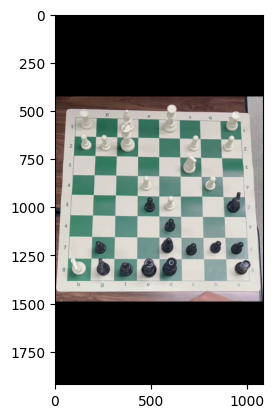

In [ ]:
# Read videos
import editdistance

f = open('chess_solution_final_seen.csv','r')
score = 0
n = 0
for line in f:
  video_name, moves_sol, p,link = line.split(',')
  moves = chess_move(video_name)
  s = 1 - editdistance.eval(moves,moves_sol)  / max(len(moves),len(moves_sol))
  score += s
  print(f"your result: ",moves)
  print(f"solution   : ",moves_sol )
  print(f"The edit distance between your results and solution is {s}.")
  n += 1
f.close()
if n != 0:
  print("-----------------------")
  print("Total score :",score/n)
  print("-----------------------")

